<a href="https://colab.research.google.com/github/Ngoc-Cac/LTPTDL-Group2/blob/duc/duc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class Node:
    def __init__(self, name):
        self.name = name
        self.neighbors = {}

    def add_neighbor(self, neighbor, weight=1):
        self.neighbors[neighbor] = weight

In [11]:
class Graph:
    def __init__(self):
        self.nodes = {}

    def add_node(self, name):
        self.nodes[name] = Node(name)

    def add_edge(self, node_a, node_b, weight=1):
        if node_a not in self.nodes:
            self.add_node(node_a)
        if node_b not in self.nodes:
            self.add_node(node_b)
        self.nodes[node_a].add_neighbor(node_b, weight)
        self.nodes[node_b].add_neighbor(node_a, weight)  # undirected graph

    def dijkstra(self, start, goal):
        open_set = []
        heapq.heappush(open_set, (0, start))
        came_from = {}
        g_score = {node: float('inf') for node in self.nodes}
        g_score[start] = 0

        while open_set:
            current_g, current_node = heapq.heappop(open_set)
            print(f"Visiting node {current_node} with current g-score {current_g}")

            if current_node == goal:
                print("Goal reached!")
                return self.reconstruct_path(came_from, current_node)

            for neighbor, weight in self.nodes[current_node].neighbors.items():
                tentative_g_score = g_score[current_node] + weight
                if tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current_node
                    g_score[neighbor] = tentative_g_score
                    heapq.heappush(open_set, (tentative_g_score, neighbor))

        return None

    def a_star(self, start, goal):
        # A* without coordinates, using g_score for this case
        open_set = []
        heapq.heappush(open_set, (0, start))
        came_from = {}
        g_score = {node: float('inf') for node in self.nodes}
        g_score[start] = 0
        f_score = {node: float('inf') for node in self.nodes}
        f_score[start] = g_score[start]  # No heuristic since no coordinates

        while open_set:
            _, current = heapq.heappop(open_set)
            print(f"Visiting node {current} with f-score {f_score[current]}")

            if current == goal:
                print("Goal reached!")
                return self.reconstruct_path(came_from, current)

            for neighbor, weight in self.nodes[current].neighbors.items():
                tentative_g_score = g_score[current] + weight
                if tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = g_score[neighbor]  # no heuristic
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

        return None

    def reconstruct_path(self, came_from, current):
        total_path = [current]
        while current in came_from:
            current = came_from[current]
            total_path.append(current)
        total_path.reverse()
        print("Path:", " -> ".join(map(str, total_path)))
        return total_path

    def visualize(self, path=None, title="Graph Visualization"):
        G = nx.Graph()
        for node_name, node in self.nodes.items():
            for neighbor, weight in node.neighbors.items():
                G.add_edge(node_name, neighbor, weight=weight)

        pos = nx.spring_layout(G)  # Auto-generate positions for nodes
        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=10)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        if path:
            path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

        plt.title(title)
        plt.show()

Running Dijkstra:
Visiting node (0, 1) with current g-score 0
Visiting node (0, 0) with current g-score 2
Visiting node (1, 0) with current g-score 2
Goal reached!
Path: (0, 1) -> (1, 0)


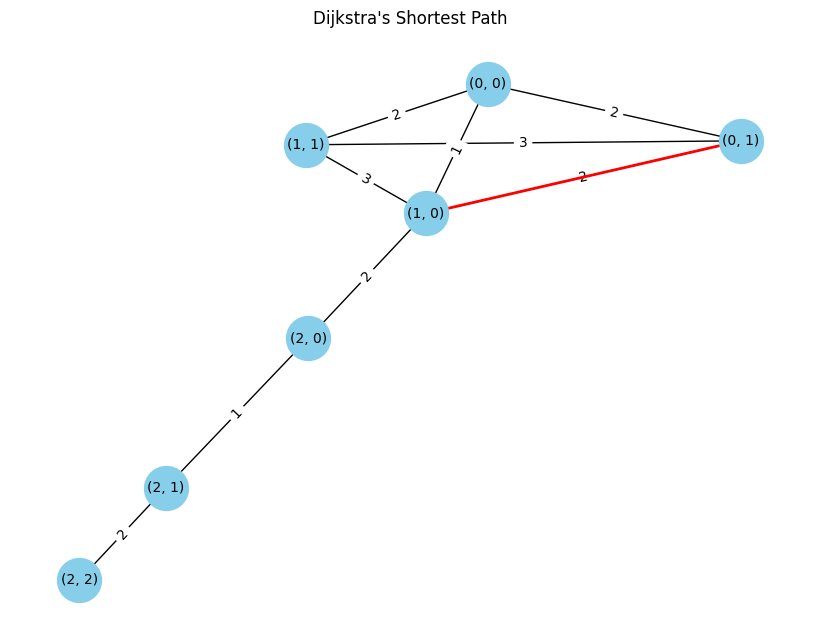


Running A*:
Visiting node (0, 1) with f-score 0
Visiting node (0, 0) with f-score 2
Visiting node (1, 0) with f-score 2
Goal reached!
Path: (0, 1) -> (1, 0)


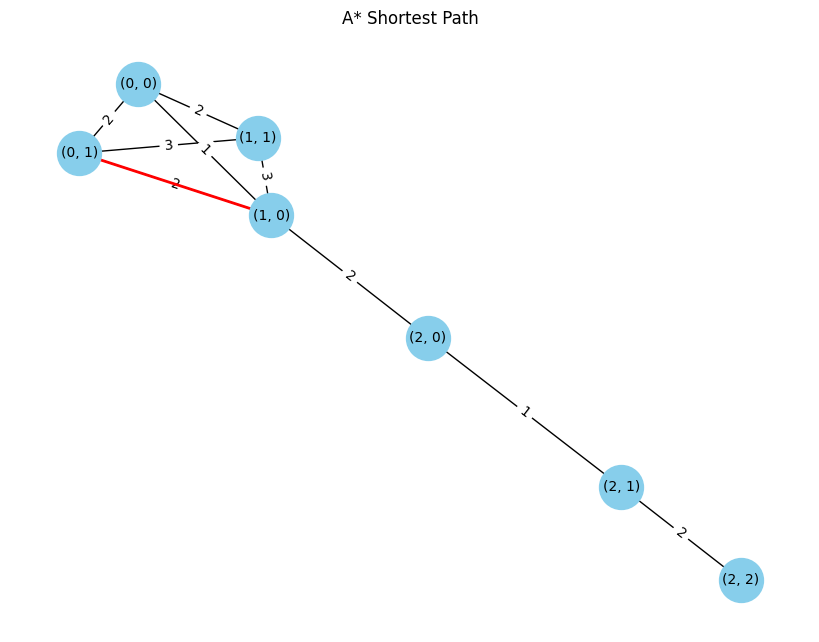

In [12]:
graph = Graph()

graph.add_edge((0, 0), (1, 0), 1)
graph.add_edge((0, 0), (0, 1), 2)
graph.add_edge((1, 0), (1, 1), 3)
graph.add_edge((1, 1), (0, 1), 3)
graph.add_edge((1, 0), (2, 0), 2)
graph.add_edge((2, 0), (2, 1), 1)
graph.add_edge((2, 1), (2, 2), 2)
graph.add_edge((0, 0), (1, 1), 2)
graph.add_edge((0, 1), (1, 0), 2)

start = (0, 1)
goal = (1, 0)

# Run Dijkstra
print("Running Dijkstra:")
dijkstra_path = graph.dijkstra(start, goal)
graph.visualize(dijkstra_path, title="Dijkstra's Shortest Path")

# Run A*
print("\nRunning A*:")
a_star_path = graph.a_star(start, goal)
graph.visualize(a_star_path, title="A* Shortest Path")

In [13]:
def load_data_from_excel(file_path):
    df=pd.read_excel(file_path, sheet_name='Edges', index_col=0)

    # Create graph
    graph = Graph()

    for index, row in df.iterrows():
        start_node = row[0]
        end_node = row[1]
        weight = row[2]
        graph.add_edge(start_node, end_node, weight)

    return graph

<ipython-input-13-c673840334ae>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_node = row[0]
<ipython-input-13-c673840334ae>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_node = row[1]
<ipython-input-13-c673840334ae>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  weight = row[2]


Running Dijkstra:
Visiting node 1 with current g-score 0
Visiting node 4.0 with current g-score 2.0
Visiting node 2.0 with current g-score 3.0
Visiting node 9.0 with current g-score 4.0
Visiting node 0.0 with current g-score 5.0
Visiting node 5.0 with current g-score 5.0
Visiting node 6.0 with current g-score 5.0
Visiting node 7.0 with current g-score 5.0
Visiting node 3.0 with current g-score 6.02
Goal reached!
Path: 1 -> 2.0 -> 3.0


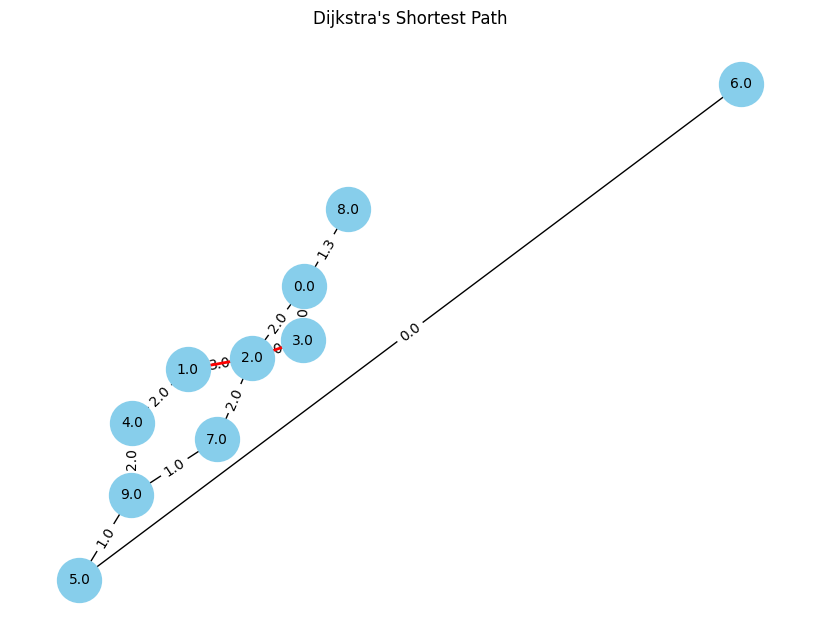


Running A*:
Visiting node 1 with f-score 0
Visiting node 4.0 with f-score 2.0
Visiting node 2.0 with f-score 3.0
Visiting node 9.0 with f-score 4.0
Visiting node 0.0 with f-score 5.0
Visiting node 5.0 with f-score 5.0
Visiting node 6.0 with f-score 5.0
Visiting node 7.0 with f-score 5.0
Visiting node 3.0 with f-score 6.02
Goal reached!
Path: 1 -> 2.0 -> 3.0


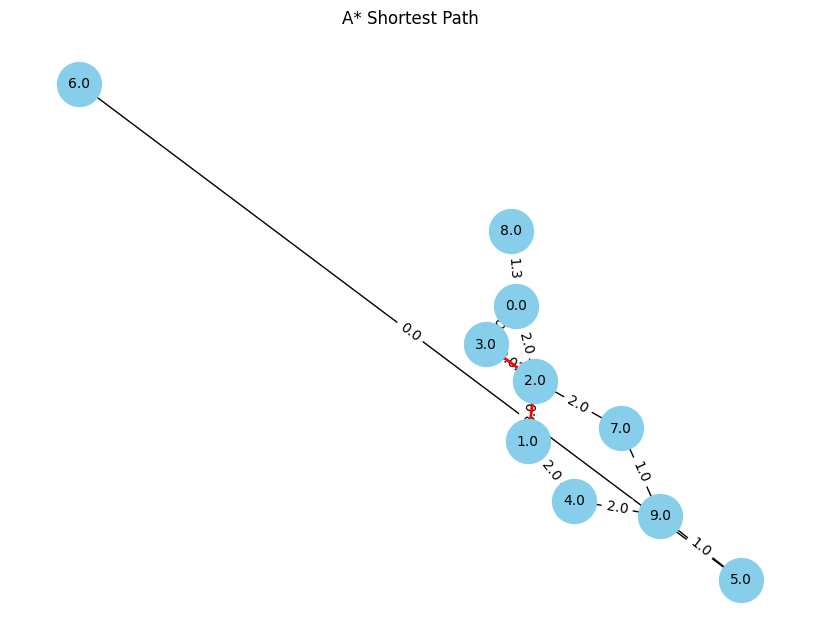

In [14]:
file_path='/content/drive/MyDrive/Colab Notebooks/LTPTXLDL/Data/graph.xlsx'
graph = load_data_from_excel(file_path)

start = 1
goal = 3

# Run Dijkstra
print("Running Dijkstra:")
dijkstra_path = graph.dijkstra(start, goal)
graph.visualize(dijkstra_path, title="Dijkstra's Shortest Path")

# Run A*
print("\nRunning A*:")
a_star_path = graph.a_star(start, goal)
graph.visualize(a_star_path, title="A* Shortest Path")